# Assignment14_Decision Tree(fraud_check)

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image

# 1 - Business Problem

_Use decision trees to prepare a model on fraud data treating those who have taxableincome <= 30000 as "Risky" and others are "Good"

# 2 - Data collection and description

In [184]:
df = pd.read_csv("Fraud_check.csv")
df1 = df.copy()
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [185]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [186]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [187]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

Outlier Check

C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


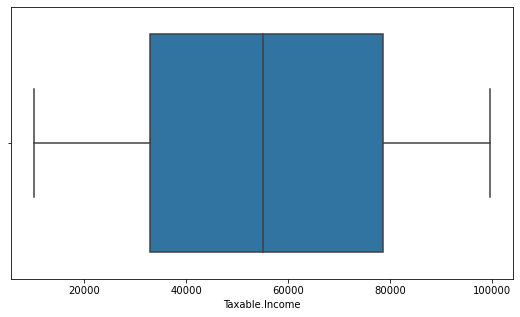

In [188]:
ax = sns.boxplot(df1['Taxable.Income'])

There are no outliers in the data

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


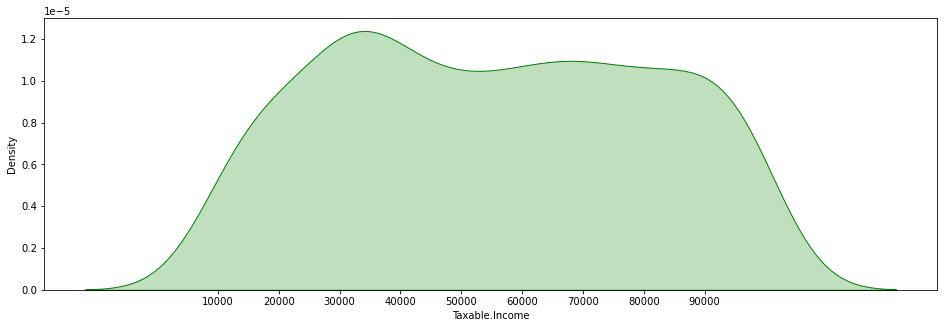

In [189]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

The data is Skwed on the right
The data has negative Kurtosis

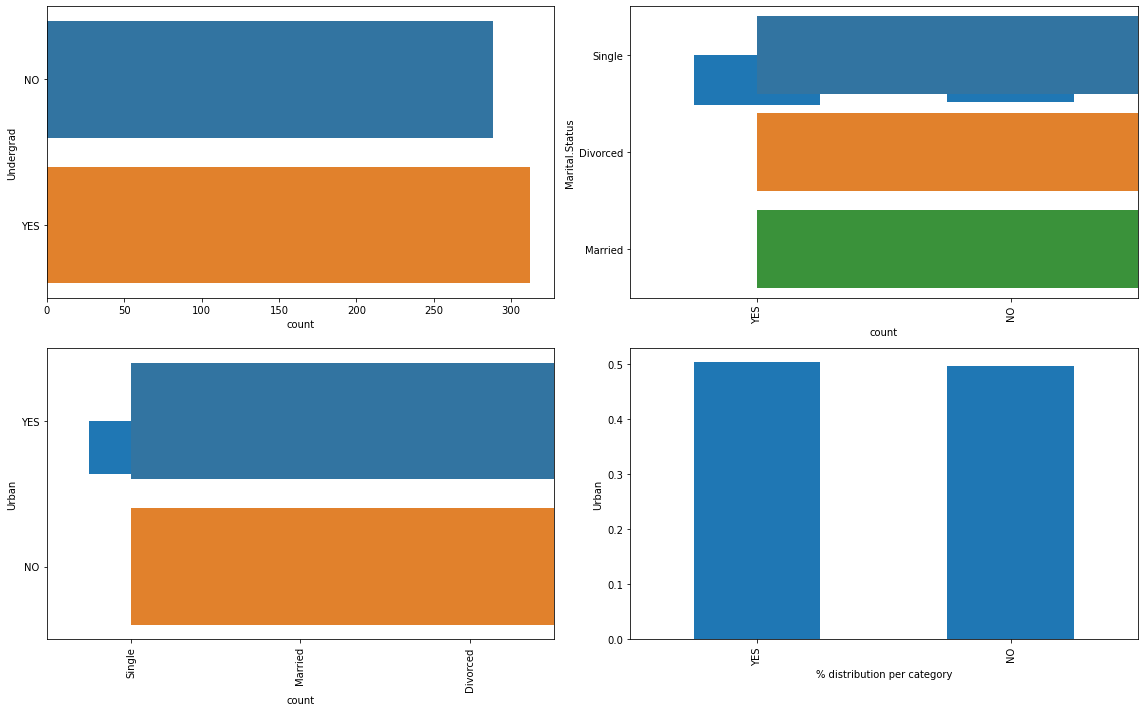

In [190]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

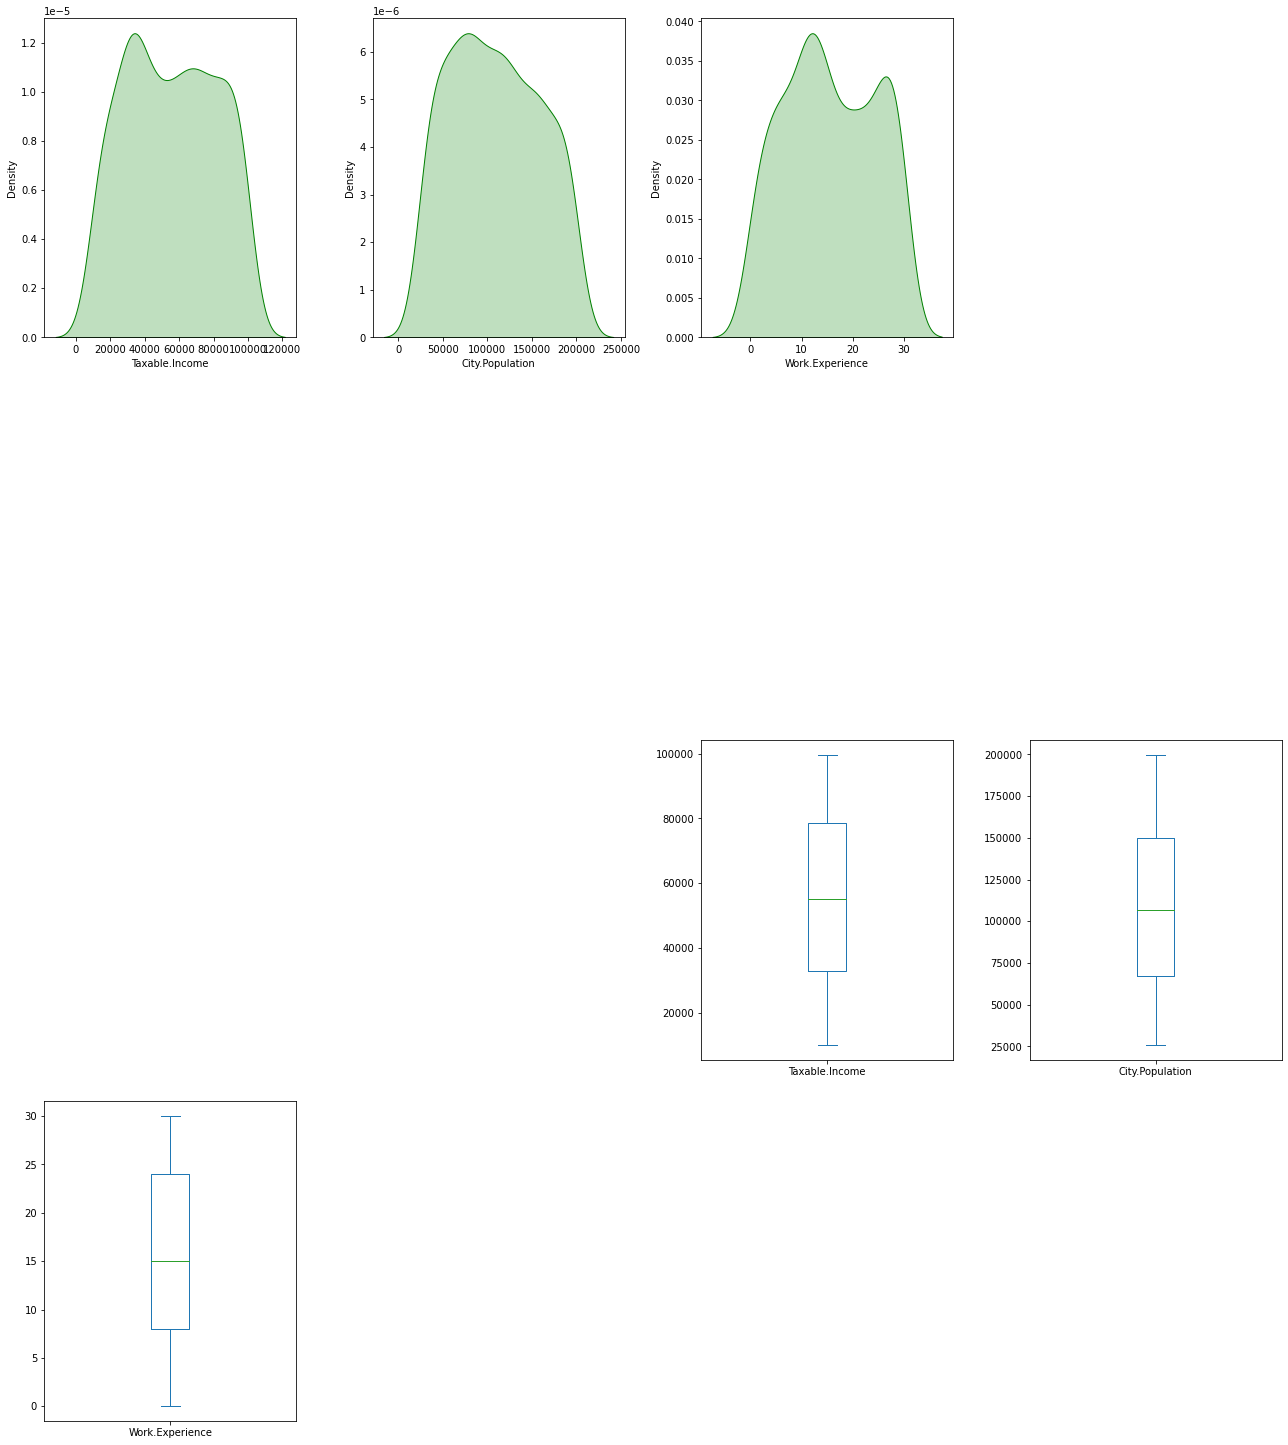

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [191]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

<AxesSubplot:>

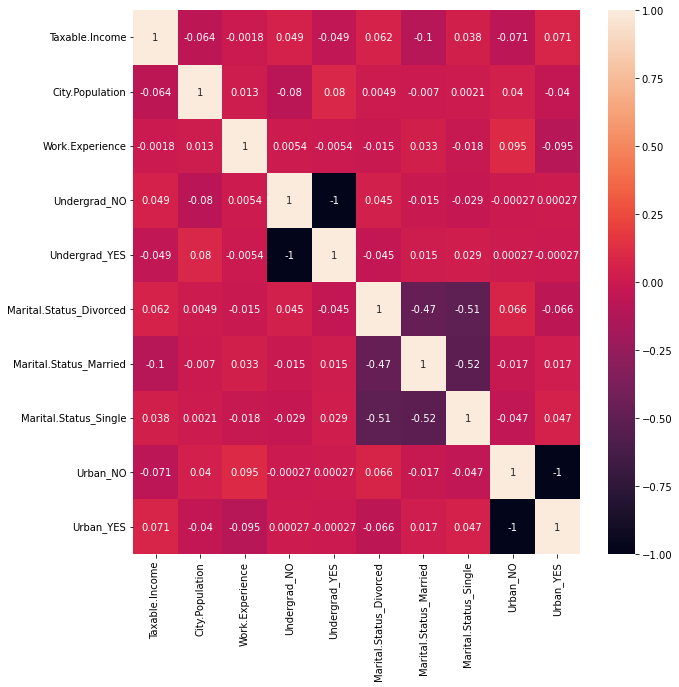

In [192]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])
corr = df1.corr()
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# 3 - Decision Tree

Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [193]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [194]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
y_train.value_counts()

good     386
risky     94
Name: Taxable.Income, dtype: int64

In [195]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [196]:
pred_train = model.predict(x_train)

In [197]:
accuracy_score(y_train,pred_train)

1.0

In [198]:
confusion_matrix(y_train,pred_train)

array([[386,   0],
       [  0,  94]], dtype=int64)

In [199]:
pred_test = model.predict(x_test)
accuracy_score(y_test,pred_test)

0.6333333333333333

In [200]:
confusion_matrix(y_test,pred_test)

array([[69, 21],
       [23,  7]], dtype=int64)

In [201]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [202]:
df_t

,Actual,Predicted
174,good,good
362,risky,risky
490,good,good
538,good,good
536,good,risky
...,...,...
334,good,good
390,good,good
42,good,good
345,good,good


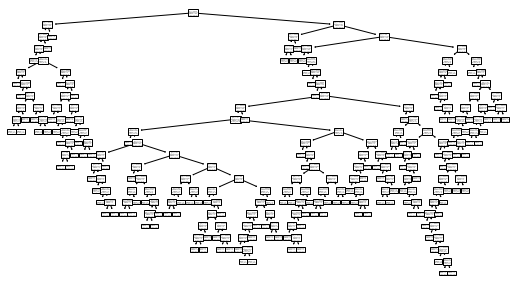

In [203]:
tree.plot_tree(model);

In [206]:
df1.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

[Text(515.6986310840708, 1063.5652173913045, 'City.Population <= 60294.5\nentropy = 0.714\nsamples = 480\nvalue = [386, 94]\nclass = T'),
 Text(111.10619469026548, 1016.2956521739131, 'City.Population <= 54407.0\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]\nclass = T'),
 Text(98.76106194690266, 969.0260869565218, 'City.Population <= 53980.5\nentropy = 0.613\nsamples = 86\nvalue = [73, 13]\nclass = T'),
 Text(86.41592920353983, 921.7565217391304, 'Work.Experience <= 6.5\nentropy = 0.587\nsamples = 85\nvalue = [73, 12]\nclass = T'),
 Text(74.070796460177, 874.4869565217392, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = T'),
 Text(98.76106194690266, 874.4869565217392, 'Undergrad_YES <= 0.5\nentropy = 0.634\nsamples = 75\nvalue = [63, 12]\nclass = T'),
 Text(37.0353982300885, 827.2173913043479, 'City.Population <= 35917.5\nentropy = 0.454\nsamples = 42\nvalue = [38, 4]\nclass = T'),
 Text(24.690265486725664, 779.9478260869566, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]\ncl

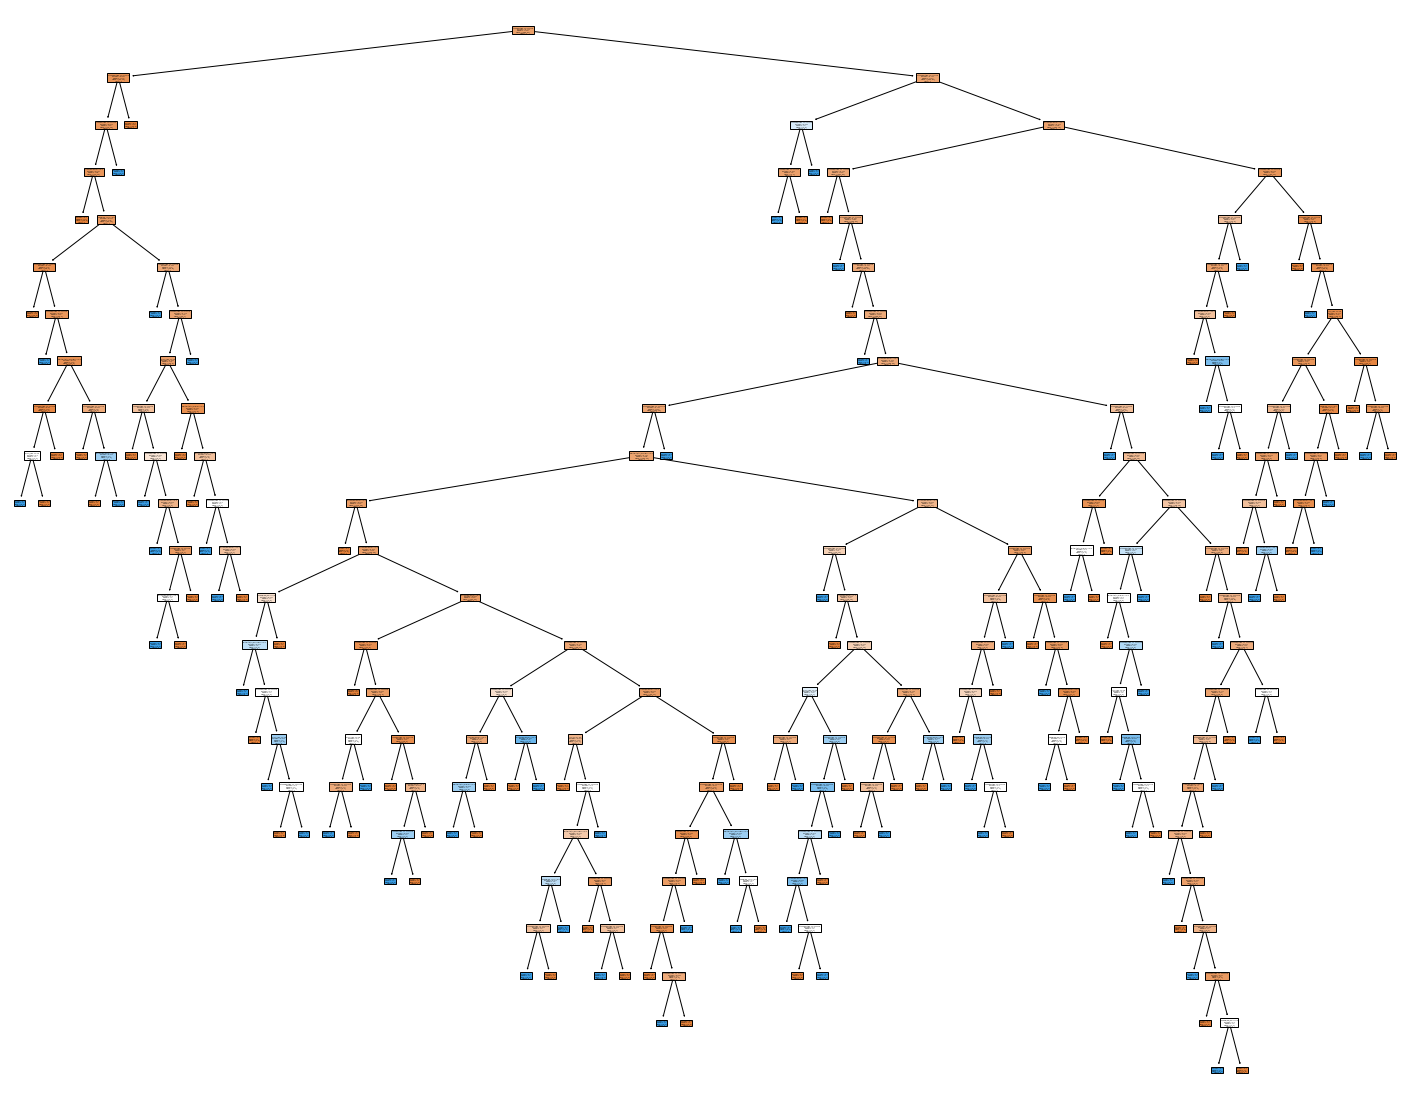

In [207]:
cols = list(df1.columns)
fn = cols[1:10]
cn = cols[0]
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [208]:
img=fig.savefig("decistion_tree_Fraud.png")

# 4 - Conclusion

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 63%
As seen in the confusion matrix of Test data 76 instances are presdected correctly and 44 instances are not

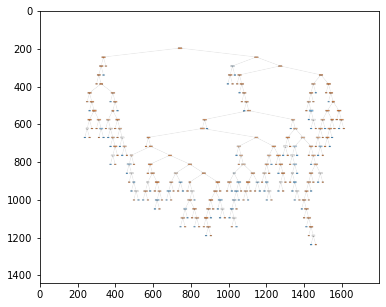

In [209]:
img = mpimg.imread('decistion_tree_Fraud.png') 
plt.imshow(img)

In [210]:
model.feature_importances_

array([0.6548402 , 0.18134236, 0.01984518, 0.02976085, 0.00950988,
       0.01355619, 0.03163148, 0.02014889, 0.03936497])

In [211]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
0,City.Population,0.654840
1,Work.Experience,0.181342
8,Urban_YES,0.039365
6,Marital.Status_Single,0.031631
3,Undergrad_YES,0.029761
7,Urban_NO,0.020149
2,Undergrad_NO,0.019845
5,Marital.Status_Married,0.013556
4,Marital.Status_Divorced,0.009510


As seen above city population is most important feature